# Fit log curves for Dragut & Kang

Offline demo: use points in `literature_matrix.csv` → fit  
`y = a · log(b·x + 1)` → store parameters & plot.


In [1]:
# ---- add project root so we can 'import src.*' ----
import sys, pathlib, os
ROOT = pathlib.Path(os.getcwd()).parent      # notebooks/.. = project root
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))
print("Added to sys.path:", ROOT)


Added to sys.path: c:\Users\zuzia\OneDrive - Temple University\Documents\MS Computational DS\Summer 2025\Research\Project\cost-utility-calculator


In [2]:
import os, sys, pandas as pd, numpy as np, matplotlib.pyplot as plt
%matplotlib inline

# allow 'src' imports
sys.path.append(os.path.abspath('..'))

from src.curves import fit_log_curve
from src.utils  import parse_curve   # already written earlier

df = pd.read_csv('../docs/literature_matrix.csv')
df[['Paper', 'Key Curve Data']].head()

,Paper,Key Curve Data
0,Dragut et al. 2019,0:0.58;30:0.72;60:0.78;120:0.80
1,Kang et al. 2023,0:0.65;100:0.76;300:0.81;600:0.83
2,Stiennon et al. 2021,0:0.0;5000:0.15;20000:0.24;40000:0.28
3,Strubell et al. 2019,GPUh:626 kWh ≈ 280 kg CO₂


Dragut fit  a=0.252  b=0.3259  RMSE=0.303


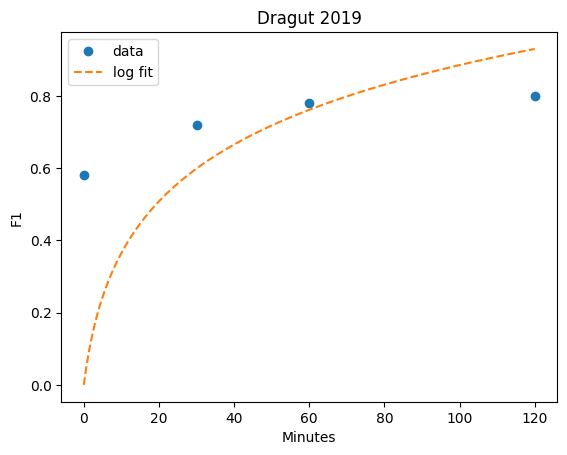

In [3]:
row_d = df[df['Paper'].str.contains('Dragut')].iloc[0]
x_d, y_d = zip(*parse_curve(row_d['Key Curve Data']))

a_d, b_d, rmse_d = fit_log_curve(list(x_d), list(y_d))
print(f"Dragut fit  a={a_d:.3f}  b={b_d:.4f}  RMSE={rmse_d:.3f}")

x_dense = np.linspace(0, max(x_d), 200)
y_fit   = a_d * np.log(b_d * x_dense + 1)

plt.plot(x_d, y_d, 'o', label='data')
plt.plot(x_dense, y_fit, '--', label='log fit')
plt.title('Dragut 2019')
plt.xlabel('Minutes'); plt.ylabel('F1'); plt.legend()
plt.savefig('../docs/figures/dragut_log_fit.png', dpi=150)
plt.show()


Kang fit    a=0.261  b=0.0744  RMSE=0.351


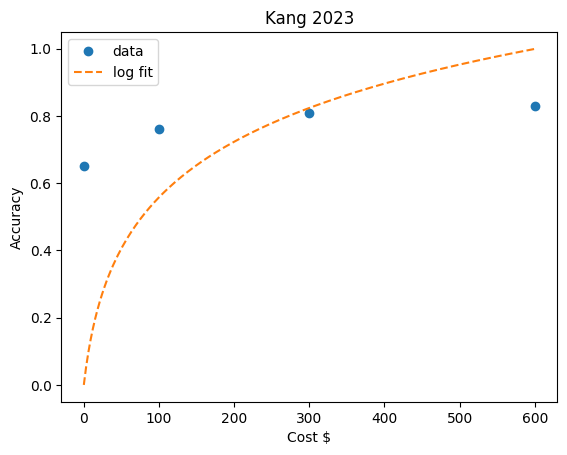

In [4]:
row_k = df[df['Paper'].str.contains('Kang')].iloc[0]
x_k, y_k = zip(*parse_curve(row_k['Key Curve Data']))


a_k, b_k, rmse_k = fit_log_curve(list(x_k), list(y_k))
print(f"Kang fit    a={a_k:.3f}  b={b_k:.4f}  RMSE={rmse_k:.3f}")

x_dense = np.linspace(0, max(x_k), 200)
plt.plot(x_k, y_k, 'o', label='data')
plt.plot(x_dense, a_k*np.log(b_k*x_dense + 1), '--', label='log fit')
plt.title('Kang 2023')
plt.xlabel('Cost $'); plt.ylabel('Accuracy'); plt.legend()
plt.savefig('../docs/figures/kang_log_fit.png', dpi=150)
plt.show()


Saved → C:\Users\zuzia\OneDrive - Temple University\Documents\MS Computational DS\Summer 2025\Research\Project\cost-utility-calculator\data\curves.json 
 {
  "Dragut2019": {
    "a": 0.252,
    "b": 0.3258756007084436,
    "rmse": 0.3034459512787006
  },
  "Kang2023": {
    "a": 0.26144999999999996,
    "b": 0.07443335780186082,
    "rmse": 0.35077038410748335
  }
}


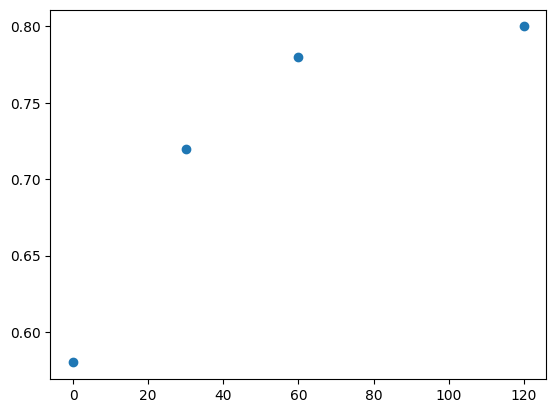

In [ ]:
# --- Save fitted parameters to data/curves.json ---

import json, pathlib
from src.utils import parse_curve
from src.curves import fit_log_curve
import pandas as pd

# 1. Load the learning-curve points from the CSV
df = pd.read_csv("../docs/literature_matrix.csv")

def get_xy(paper_substr):
    row = df[df["Paper"].str.contains(paper_substr)].iloc[0]
    return parse_curve(row["Key Curve Data"])

# 2. Fit Dragut and Kang curves
x_d, y_d = zip(*get_xy("Dragut"))
x_k, y_k = zip(*get_xy("Kang"))

a_d, b_d, rmse_d = fit_log_curve(list(x_d), list(y_d))
a_k, b_k, rmse_k = fit_log_curve(list(x_k), list(y_k))

# 3. Serialize to JSON  ← add rmse to the dict
fits = {
    "Dragut2019": {"a": a_d, "b": b_d, "rmse": rmse_d},
    "Kang2023":   {"a": a_k, "b": b_k, "rmse": rmse_k}
}

path = pathlib.Path("../data/curves.json")
path.write_text(json.dumps(fits, indent=2))
print("Saved →", path.resolve(), "\n", json.dumps(fits, indent=2))
